### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [332]:
data = pd.read_csv('data/coupons.csv')

In [333]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [334]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

*__The data has very few columns with numeric data type.  Most of the data is string/object.  We will need some transformations to convert string/object data into numeric equivalent to perform statistical calculation for a correlation matrix.__*

2. Investigate the dataset for missing or problematic data.

In [335]:
# Number of Rows in the dataset
totalRows = len(data)
print(str(totalRows) + ' Rows')

12684 Rows


In [336]:
# Check with columns have missing data
missing_data = data.isnull().sum()

In [337]:
# Percentage of rows with missing data
missing_data[ missing_data > 0 ] / len(data)

car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
dtype: float64

*Check unique values on columns with missing data to decide if we can replace the missing value with an adecuate existing value.*

In [338]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [339]:
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [340]:
data['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [341]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [342]:
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [343]:
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [344]:
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [345]:
data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [346]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [347]:
# Rows that have missing data
countRowsMissingData = len(data.query('Bar.isnull() | CoffeeHouse.isnull() | CarryAway.isnull() | RestaurantLessThan20.isnull() | Restaurant20To50.isnull()', engine='python'))
print(str(countRowsMissingData) + ' Rows with missing data ' + '{:.2%}'.format(countRowsMissingData / totalRows))
      

605 Rows with missing data 4.77%


In [348]:
# Check income not being numeric
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [349]:
# Check age not being numeric
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

#### Problematic data type
- Age is object and should be integer.  Age is a sample selection more that a number.  It would be preferable to have a number.  I will create a new column with a age asociated to the selection.

- Income is object and should be integer.  Income is a sample selection more that a number.  It would be preferable to have a number.  For now, I would try to use as is and later decide if any conversion is needed.


3. Decide what to do about your missing data -- drop, replace, other...

In [350]:
# 99% of the rows have car Null 
# This is useless data, drop the column
del data['car']

There are 605 rows that account for 4.77% of the rows that have some missing value. The missing data is:

- Bar                     0.008436
- CoffeeHouse             0.017108
- CarryAway               0.011905
- RestaurantLessThan20    0.010249
- Restaurant20To50        0.014901

Individually, each missing value is not much; but collectively the 605 rows account for a significant percentage.  I really don't want to drop the 605 rows so my first option will be to convert the Nulls to an option 'no answer'.

In [351]:
# Convert the Null values to 'no answer'
data['Bar'].fillna('no answer', inplace=True)
data['CoffeeHouse'].fillna('no answer', inplace=True)
data['CarryAway'].fillna('no answer', inplace=True)
data['RestaurantLessThan20'].fillna('no answer', inplace=True)
data['Restaurant20To50'].fillna('no answer', inplace=True)

In [352]:
# Validate that the conversion of Null values worked so that rows don't have missing data after replace
countRowsMissingData2 = len(data.query('Bar.isnull() | CoffeeHouse.isnull() | CarryAway.isnull() | RestaurantLessThan20.isnull() | Restaurant20To50.isnull()', engine='python'))
print(str(countRowsMissingData2) + ' Rows with missing data ' + '{:.2%}'.format(countRowsMissingData2 / totalRows))

0 Rows with missing data 0.00%


#### Create new Age column
- values that can have a numeric conversion will be converted as is to number
- '50plus' will be converted to 50
- 'below21' will be converted to 20

In [353]:
# Create new column for age_number
# Create a new column with the same value as age
data['age_number'] = data['age']

In [354]:
# Convert age to appropiate value as documented above
data["age_number"] = data["age_number"].str.replace("50plus", "50")
data["age_number"] = data["age_number"].str.replace("below21", "20")
data["age_number"] = pd.to_numeric(data["age_number"])


4. What proportion of the total observations chose to accept the coupon? 



In [355]:
# sum rows that accepted the coupon divided by total number of rows
acceptCouponPercent = data['Y'].sum() / totalRows
print('Proportion of the total observations chose to accept the coupon ' + '{:.2%}'.format(acceptCouponPercent))

Proportion of the total observations chose to accept the coupon 56.84%


5. Use a bar plot to visualize the `coupon` column.

Using a bar plot to visualize the *coupon* column against to *Y* (accepted) column will show the acceptance percentage by coupon type

Text(0.5, 1.0, 'Proportion of accepted coupon by coupon type')

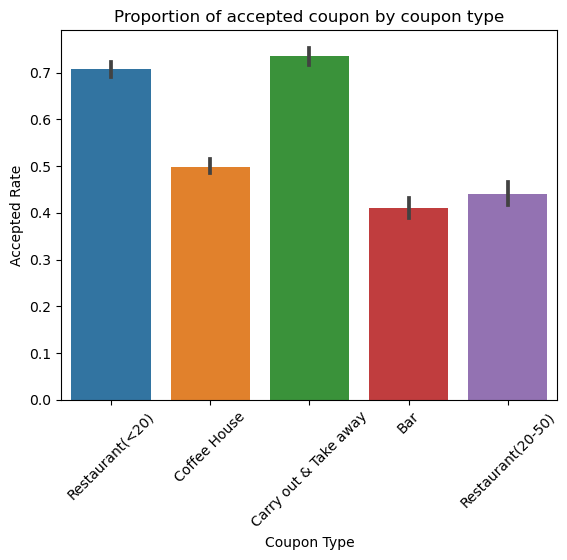

In [356]:
sns.barplot(data=data, x='coupon', y='Y')
plt.xticks(rotation = 45)
plt.xlabel('Coupon Type')
plt.ylabel('Accepted Rate')
plt.title('Proportion of accepted coupon by coupon type')

### Observation
- Carry out & Take away has the best acceptace rate well over 70%
- Restaurant (< 20) has the second best acceptance rate at 70%
- The other coupons have 50% or less acceptance rate

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram')

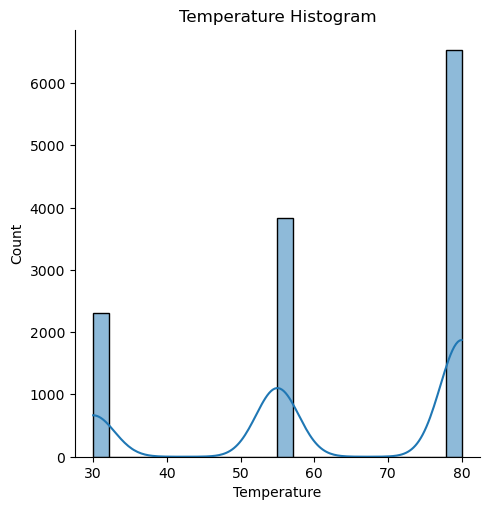

In [357]:
sns.displot(data['temperature'],kde=True)
plt.xlabel('Temperature')
plt.title('Temperature Histogram')

In [358]:
# Check the unique temperature values to validate histogram
data['temperature'].unique()

array([55, 80, 30], dtype=int64)

### Observation
The Temperature column only has three (3) values as can be seen in the histogram.  Not much of a range of values to produce a good distribution using only temperature.  Nothing to conclude using only temperature.

Lets try temperature against *Y* to get the acceptance of coupons as it relates to temperature.

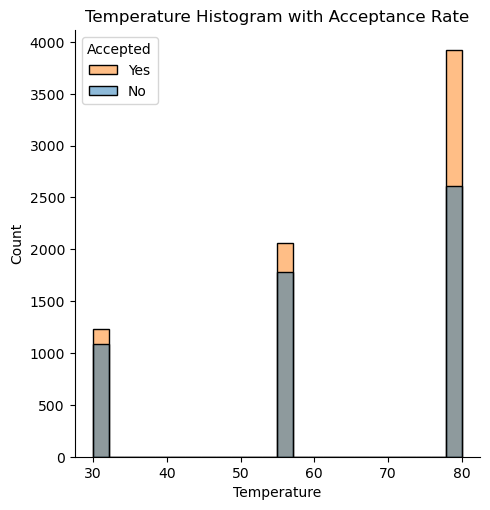

In [359]:
sns.displot(data, x='temperature', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper left', labels=['Yes', 'No'])
plt.xlabel('Temperature')
plt.title('Temperature Histogram with Acceptance Rate')
plt.show()

### Observation
Combining Temperature with Accepted in the histogram we can observe a clear trend that as the temperature goes up so does the acceptance rate.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [360]:
# Query the dataframe for rows with bar coupons
barData = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [361]:
# Using the bar coupon subset
# Sum rows that accepted the coupon divided by total number of rows
acceptBarCouponPercent = barData['Y'].sum() / len(barData)
print('Proportion of the Bar Coupons choose to accept the coupon ' + '{:.2%}'.format(acceptBarCouponPercent))

Proportion of the Bar Coupons choose to accept the coupon 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [362]:
# Check unique values in 'Bar' to create list that correspondes to 3 of fewer, and 4 or more
barData['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', 'no answer', '4~8'], dtype=object)

In [363]:
# I will include the 'no answer' as 3 or fewer
listBar_3_or_fewer = ['never', 'less1', '1~3', 'no answer']

In [364]:
# Calculate 3 or fewer
bar_3_or_fewer_accepted = (barData.Bar.isin(listBar_3_or_fewer) & barData['Y'] == 1).sum()
bar_3_or_fewer_base = barData.Bar.isin(listBar_3_or_fewer).sum()
acceptBarCoupon_3_or_fewer = bar_3_or_fewer_accepted / bar_3_or_fewer_base
      

In [365]:
# Calculate 4 or more
bar_4_or_more_accepted = (~barData.Bar.isin(listBar_3_or_fewer) & barData['Y'] == 1).sum()
bar_4_or_more_base = (~barData.Bar.isin(listBar_3_or_fewer)).sum()
acceptBarCoupon_4_or_more = bar_4_or_more_accepted / bar_4_or_more_base
      

In [366]:
print('Proportion of the Bar Coupons choose to accept the coupon:')
print('Went to bar 3 or fewer times a month ' + '{:.2%}'.format(acceptBarCoupon_3_or_fewer))
print('Went to bar 4 or more times a month ' + '{:.2%}'.format(acceptBarCoupon_4_or_more))


Proportion of the Bar Coupons choose to accept the coupon:
Went to bar 3 or fewer times a month 37.07%
Went to bar 4 or more times a month 76.88%


### Observation
- Persons that went to bars 3 or fewer times per month accepted bar coupons 37% of the times which is lower than the overall Bar acceptance rate of 41%.
- Persons that went to bars 4 or more times per month accepted bar coupons 76% of the times which is much higher than the overall Bar acceptance rate of 41%.

#### Conclusion
##### Bar coupons are more effective on persons that frequent bars more that 4 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [367]:
# Create a list of more than once a month.  
# There is no option that excludes 1 per month as the selection is 1~3 (1 to 3 times)
# I will include the 1~3 as a valid selection, excluding the never, less1, and no answer
listBar_less_than_1 = ['never', 'less1', 'no answer']

In [368]:
# Calculate 1 or more a month and are over 25 years that accepted the coupon
bar_more_1_25_years_accepted = (~barData.Bar.isin(listBar_less_than_1) & (barData['age_number'] > 25) & (barData['Y'] == 1)).sum()
bar_more_1_25_years_base = (~barData.Bar.isin(listBar_less_than_1) & (barData['age_number'] > 25)).sum()
acceptBarCoupon_more_1_25_years = bar_more_1_25_years_accepted / bar_more_1_25_years_base


In [369]:
# Calculate 1 or more a month and less than or equal to 25 years that accepted the coupon
bar_more_1_less_25_years_accepted = (~barData.Bar.isin(listBar_less_than_1) & (barData['age_number'] <= 25) & (barData['Y'] == 1)).sum()
bar_more_1_less_25_years_base = (~barData.Bar.isin(listBar_less_than_1) & (barData['age_number'] <= 25)).sum()
acceptBarCoupon_more_1_less_25_years = bar_more_1_less_25_years_accepted / bar_more_1_less_25_years_base


In [370]:
# Calculate 4 or more a month and are over 25 years that accepted the coupon
bar_more_4_25_years_accepted = (~barData.Bar.isin(listBar_3_or_fewer) & (barData['age_number'] > 25) & barData['Y'] == 1).sum()
bar_more_4_25_years_base = (~barData.Bar.isin(listBar_3_or_fewer) & (barData['age_number'] > 25)).sum()
acceptBarCoupon_more_4_25_years = bar_more_4_25_years_accepted / bar_more_4_25_years_base


In [371]:
# Calculate 4 or more a month and are less than or equal to 25 years that accepted the coupon
bar_more_4_less_25_years_accepted = (~barData.Bar.isin(listBar_3_or_fewer) & (barData['age_number'] <= 25) & barData['Y'] == 1).sum()
bar_more_4_less_25_years_base = (~barData.Bar.isin(listBar_3_or_fewer) & (barData['age_number'] <= 25)).sum()
acceptBarCoupon_more_4_less_25_years = bar_more_4_less_25_years_accepted / bar_more_4_less_25_years_base


In [372]:
print('Proportion of the Bar Coupons choose to accept the coupon:')
print('Went to bar 3 or fewer times a month ' + '{:.2%}'.format(acceptBarCoupon_3_or_fewer))
print('Went to bar 4 or more times a month ' + '{:.2%}'.format(acceptBarCoupon_4_or_more))
print('Went to bar 1 or more times a month and over 25 years ' + '{:.2%}'.format(acceptBarCoupon_more_1_25_years))
print('Went to bar 1 or more times a month and 25 years or less ' + '{:.2%}'.format(acceptBarCoupon_more_1_less_25_years))
print('Went to bar 4 or more times a month and over 25 years ' + '{:.2%}'.format(acceptBarCoupon_more_4_25_years))
print('Went to bar 4 or more times a month and 25 years or less ' + '{:.2%}'.format(acceptBarCoupon_more_4_less_25_years))



Proportion of the Bar Coupons choose to accept the coupon:
Went to bar 3 or fewer times a month 37.07%
Went to bar 4 or more times a month 76.88%
Went to bar 1 or more times a month and over 25 years 69.52%
Went to bar 1 or more times a month and 25 years or less 67.05%
Went to bar 4 or more times a month and over 25 years 77.21%
Went to bar 4 or more times a month and 25 years or less 76.19%


### Observation
- Persons that frequent bars more than 1 time per month and are over 25 years of age accepted bar coupons 69% of the times.  This is much higher that the 37% of those that frequent bars 3 times per month or less, and slightly lower of the 76% of those that frequent bars 4 times per month or more.
- Not a significant difference, 2.5%, between persons that frequent bars more than 1 a month and are over 25 or 25 or less.
<br><br>
In order to understand what attribute, frequency or age, have a higher impact on acceptance rate of bar coupons I calculated the acceptance rate of persons that frequent bars 4 or more times per month and are over 25 years of age.
<br><br>
- 77% of the persons that frequent bars 4 or more times per month and are over 25 years of ager accepted bar coupons 77% of the times.  This is just .5% higher that those that frequent bar 4 or more times per month regardless of age.
- 76% of the persons that frequent bars 4 or more times per month are are 25 years of age or less accepted bar coupons 76% of the times.  This is just .7% lower that those that frequent bar 4 of more times per month regardless of age.

#### Conclusion
##### Frequency has a higher impact that age on persons that accept bar coupons.  The higher the frequency the higher the acceptance rate.  The impact of Age in accepted coupons is really not significant once frequency is used as criteria.  


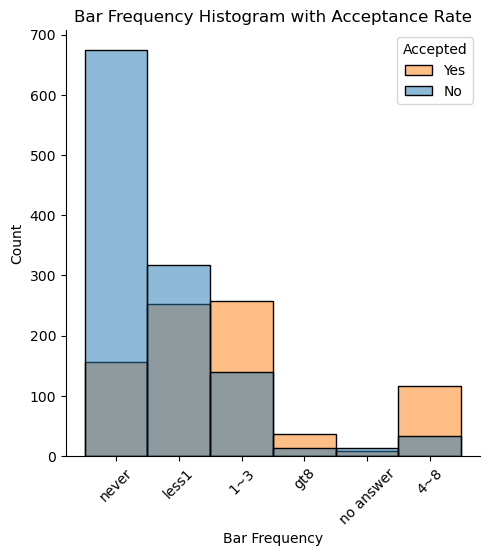

In [373]:
sns.displot(barData, x='Bar', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 45)
plt.xlabel('Bar Frequency')
plt.title('Bar Frequency Histogram with Acceptance Rate')
plt.show()

##### The Bar Frequency histogram with the Accepted hue does show that the acceptace of freqencies '1 to 3', '4 to 8', and 'Greater 8' are the ones that show a trend of increase acceptance rate.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [374]:
print('Bar data sample size ' + str(len(barData)))

Bar data sample size 2017


In [375]:
# Get some data as the size of the sample
print('Farming Fishing & Forestry ' +
str((barData.occupation.isin(['Farming Fishing & Forestry'])).sum()))

Farming Fishing & Forestry 9


In [376]:
# Get some data as the size of the sample
print('Friend(s) and Partner ' +
str((barData.passanger.isin(['Friend(s)', 'Partner'])).sum()))

Friend(s) and Partner 611


There are 2017 total rows in the barData dataframe.  The Farming, Fishing, and Forestry occupation only excludes 9 so I don't foresee high impact as criteria of acceptance.  Passenger data of not a kid has 611 rows (30% of sample) so it can provide some relevance. 

In [377]:
# Calculate proportion of question 5
# frequent bars 1 or more a month 
# had passenger that is not a kid 
#   Unique passenger values ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
#   Not kid are ['Friend(s)', 'Partner']
#   'Alone' means without passenger so it doesn't apply
# occupations other than [farming, fishing, or forestry]
#

accepted5 = (~barData.Bar.isin(listBar_less_than_1) & 
barData.passanger.isin(['Friend(s)', 'Partner']) & 
~barData.occupation.isin(['Farming Fishing & Forestry']) & 
barData['Y'] == 1).sum()

base5 = (~barData.Bar.isin(listBar_less_than_1) & 
barData.passanger.isin(['Friend(s)', 'Partner']) & 
~barData.occupation.isin(['Farming Fishing & Forestry'])).sum()

acceptBarCoupon_5 = accepted5 / base5


In [378]:
# Calculate 
# frequent bars 1 or more a month 
# had passenger that is not a kid 
#   Unique passenger values ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
#   Not kid are ['Friend(s)', 'Partner']
#   'Alone' means without passenger so it doesn't apply
#

accepted5_1 = (~barData.Bar.isin(listBar_less_than_1) & 
barData.passanger.isin(['Friend(s)', 'Partner']) & 
barData['Y'] == 1).sum()

base5_1 = (~barData.Bar.isin(listBar_less_than_1) & 
barData.passanger.isin(['Friend(s)', 'Partner'])).sum() 

acceptBarCoupon_5_1 = accepted5_1 / base5_1
         

In [379]:
print('Frequent bars 1 or more a month')
print('Had passenger that is not a kid')
print('Occupations other than [farming, fishing, or forestry]')
print('  Proportion ' + '{:.2%}'.format(acceptBarCoupon_5))
print('Remove occupation from calculation')
print('  Proportion ' + '{:.2%}'.format(acceptBarCoupon_5_1))


Frequent bars 1 or more a month
Had passenger that is not a kid
Occupations other than [farming, fishing, or forestry]
  Proportion 71.79%
Remove occupation from calculation
  Proportion 71.79%


### Observation
##### As anticipated, excluding Farming, Fishing or Forestry from calculation has no impact on the proportion.
##### The 71% acceptance rate is lower than the 76% acceptance of frequency of 4 or more a month.  Passenger that is not a kid improves acceptance rate but not as much a frequency of 4 or more a month.

6. Compare the acceptance rates between those drivers who:

- 1. go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- 2. go to bars more than once a month and are under the age of 30 *OR*
- 3. go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [380]:
# Calculate proportion of question 6.1
# frequent bars 1 or more a month 
# had passenger that is not a kid 
#   Unique passenger values ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
#   Not kid are ['Friend(s)', 'Partner']
#   'Alone' means without passenger so it doesn't apply
# marital status NOT widowed
#

accepted6_1 = (~barData.Bar.isin(listBar_less_than_1) & 
barData.passanger.isin(['Friend(s)', 'Partner']) & 
~barData.maritalStatus.isin(['Widowed']) & 
barData['Y'] == 1).sum()

base6_1 = (~barData.Bar.isin(listBar_less_than_1) & 
barData.passanger.isin(['Friend(s)', 'Partner']) & 
~barData.maritalStatus.isin(['Widowed'])).sum()

acceptBarCoupon_6_1 = accepted6_1 / base6_1


In [381]:
# Calculate proportion of question 6.2
# frequent bars 1 or more a month 
# age under 30
#

accepted6_2 = (~barData.Bar.isin(listBar_less_than_1) & 
(barData['age_number'] < 30) & 
barData['Y'] == 1).sum()

base6_2 = (~barData.Bar.isin(listBar_less_than_1) & 
(barData['age_number'] < 30)).sum()

acceptBarCoupon_6_2 = accepted6_2 / base6_2


In [382]:
# Calculate proportion of question 6.3
# Go to cheap restaurants more than 4 times a month ['RestaurantLessThan20']
#    '4~8', 'gt8'
# income less than 50K ['income']
#    ['$37500 - $49999', '$12500 - $24999',
#     '$25000 - $37499', 'Less than $12500']
#

accepted6_3 = (barData.income.isin(['$37500 - $49999', '$12500 - $24999','$25000 - $37499', 'Less than $12500']) & 
barData.RestaurantLessThan20.isin(['4~8', 'gt8']) & 
barData['Y'] == 1).sum()

base6_3 = (barData.income.isin(['$37500 - $49999', '$12500 - $24999','$25000 - $37499', 'Less than $12500']) & 
barData.RestaurantLessThan20.isin(['4~8', 'gt8'])).sum()

acceptBarCoupon_6_3 = accepted6_3 / base6_3


In [383]:
print('Question 6.1 ' + '{:.2%}'.format(acceptBarCoupon_6_1))
print('Question 6.2 ' + '{:.2%}'.format(acceptBarCoupon_6_2))
print('Question 6.3 ' + '{:.2%}'.format(acceptBarCoupon_6_3))


Question 6.1 71.79%
Question 6.2 72.17%
Question 6.3 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesize of drivers who accepted the bar coupons
We have calculated the proportion of drivers that accepted coupons using frequency, age, passenger, occupation, marital status, going to cheap restaurants, and income.
<br>
**The best criteria to determine bar coupon acceptance is bar frequency.  Drivers that go to bars 4 or more times per month accept the bar coupon at 76% of the times which is higher than any of the other evaluated combinations.**

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I selected Restaurante(20-50) coupons for the investigation.  Since this coupon is for "expensive" restaurants in this sample data, I would think that frequency, income, passenger, and destination are good estimators of acceptance. Lets dig in...

In [384]:
# Get the data for the selected coupon
restaurant2050Data = data.query('coupon == "Restaurant(20-50)"')

In [385]:
# Using the bar coupon subset
# Sum rows that accepted the coupon divided by total number of rows
accept20To50CouponPercent = restaurant2050Data['Y'].sum() / len(restaurant2050Data)
print('Proportion of the Restaurant 20 to 50 choose to accept the coupon ' + '{:.2%}'.format(accept20To50CouponPercent))

Proportion of the Restaurant 20 to 50 choose to accept the coupon 44.10%


In [386]:
# Sample size
len(restaurant2050Data)

1492

Out of a sample of 1492 drivers 44% accepted a Restaurant 20 to 50 coupon.  This is our base reference to compare with different characteristics.

I will use various histogram plots to understand the relationship of acceptance to different characteristics in order to visualize which characteristics yield a higher acceptance rate than the base.

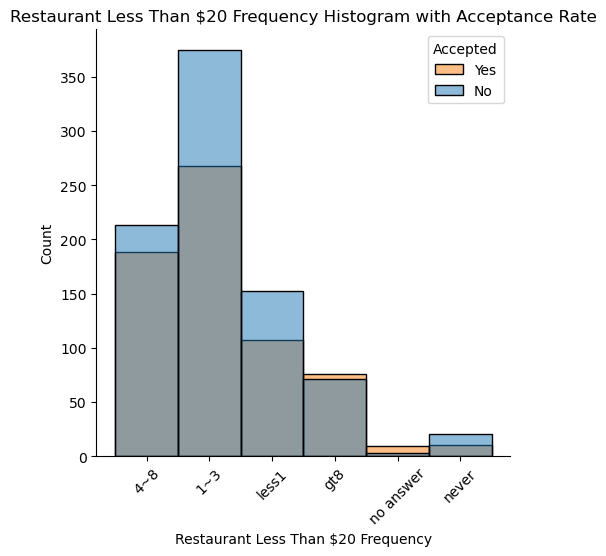

In [387]:
sns.displot(restaurant2050Data, x='RestaurantLessThan20', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 45)
plt.xlabel('Restaurant Less Than $20 Frequency')
plt.title('Restaurant Less Than $20 Frequency Histogram with Acceptance Rate')
plt.show()

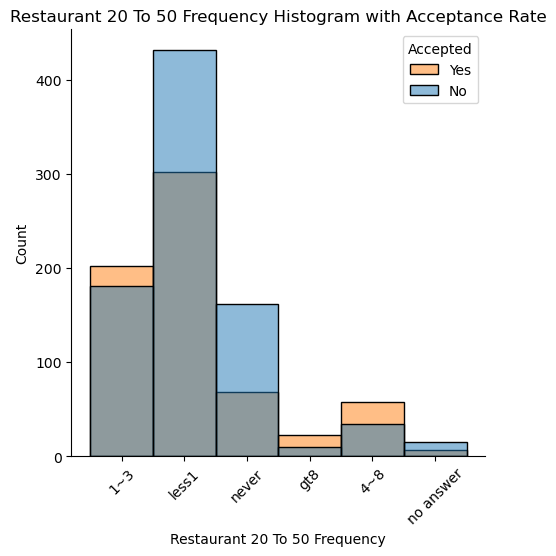

In [388]:
sns.displot(restaurant2050Data, x='Restaurant20To50', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 45)
plt.xlabel('Restaurant 20 To 50 Frequency')
plt.title('Restaurant 20 To 50 Frequency Histogram with Acceptance Rate')
plt.show()

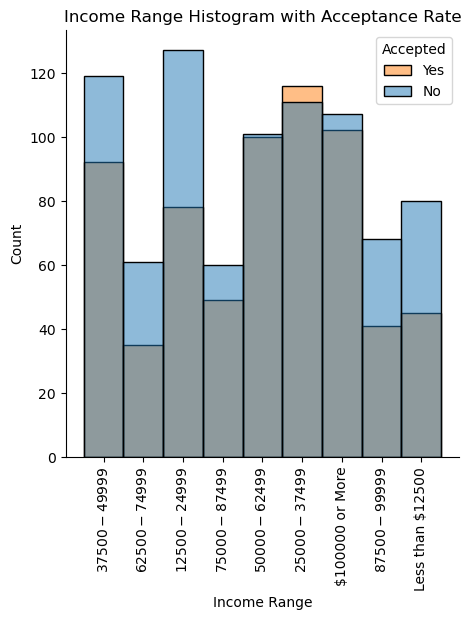

In [389]:
sns.displot(restaurant2050Data, x='income', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 90)
plt.xlabel('Income Range')
plt.title('Income Range Histogram with Acceptance Rate')
plt.show()

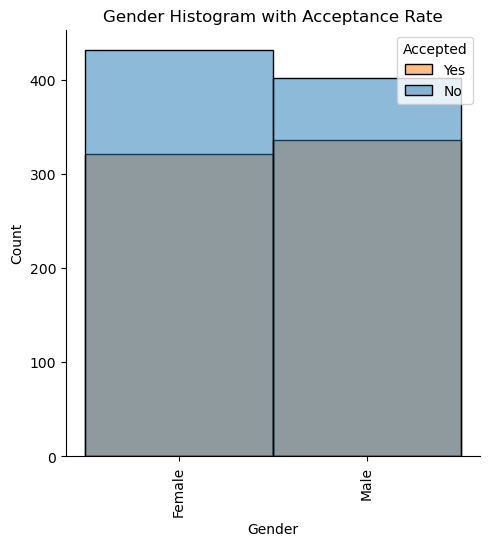

In [390]:
sns.displot(restaurant2050Data, x='gender', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 90)
plt.xlabel('Gender')
plt.title('Gender Histogram with Acceptance Rate')
plt.show()

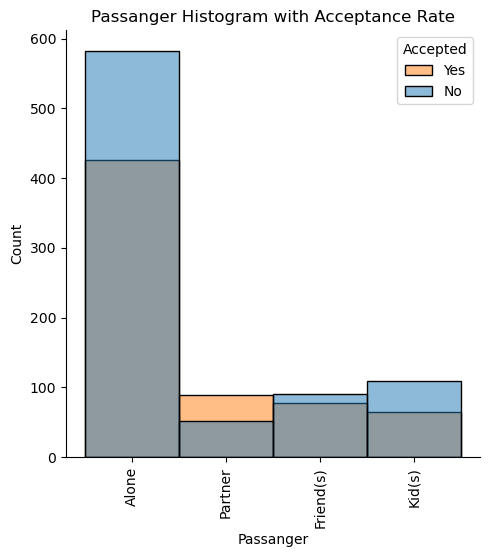

In [391]:
# passanger
sns.displot(restaurant2050Data, x='passanger', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 90)
plt.xlabel('Passanger')
plt.title('Passanger Histogram with Acceptance Rate')
plt.show()

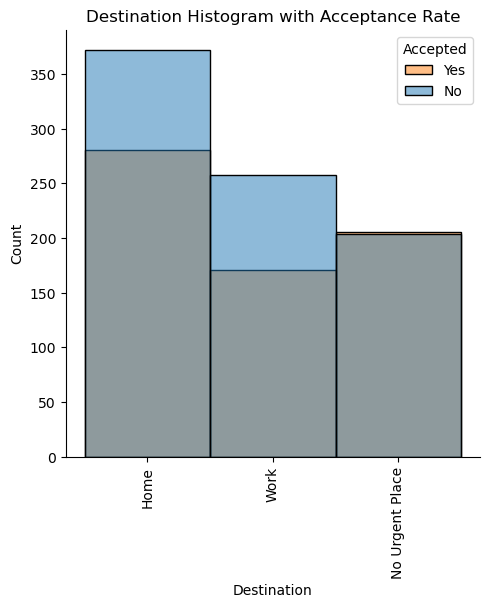

In [392]:
# destination
sns.displot(restaurant2050Data, x='destination', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 90)
plt.xlabel('Destination')
plt.title('Destination Histogram with Acceptance Rate')
plt.show()

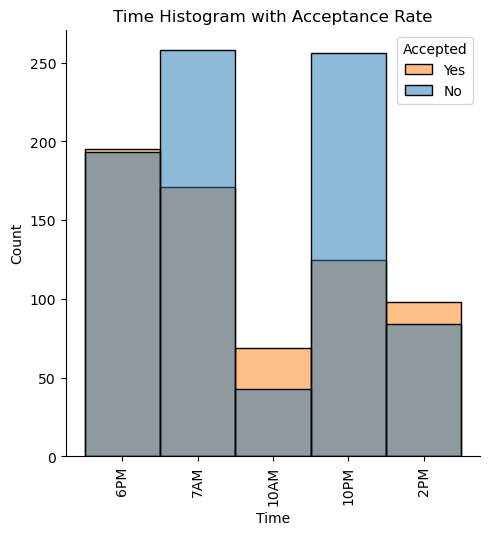

In [393]:
# time
sns.displot(restaurant2050Data, x='time', hue='Y', legend=False)
plt.legend(title='Accepted', loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation = 90)
plt.xlabel('Time')
plt.title('Time Histogram with Acceptance Rate')
plt.show()

### Observations based on the histograms
- RestaurantLessThan20 frequency is not a good characteristic to increase acceptance
- Restaurant20To50 frequency is a good characteristic to increase acceptace.  As frequency increases so the acceptance
- Income is not a good characteristic to increase acceptance.  Curiously the only income range that trend upward is the 25,000 to 37499 range.
- Gender is very neutral and therefore not a good characteristic to differentiate acceptance
- Passenger is a good characteristic when driving with a Partner
- Destination trends much lower when driving to Home or Work.  Only when destination is No Urgent Place is the acceptance holding
- Time is a good characteristic for 10:00am and 2:00pm range (lunch) and only slightly upward at 6:00pm.  

### Lets see the proportion of the identified characteristics to increase acceptance

In [394]:
# Review values 
restaurant2050Data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', 'no answer'], dtype=object)

In [395]:
restaurant2050Data['destination'].unique()

array(['Home', 'Work', 'No Urgent Place'], dtype=object)

In [396]:
restaurant2050Data['passanger'].unique()

array(['Alone', 'Partner', 'Friend(s)', 'Kid(s)'], dtype=object)

In [397]:
restaurant2050Data['time'].unique()

array(['6PM', '7AM', '10AM', '10PM', '2PM'], dtype=object)

In [398]:
# Restaurant20To50 more than 1
# Time 10AM, 2PM, and 6PM
# Passanger Partner
# Destination No Urgent Place

accepted7 = (restaurant2050Data.Restaurant20To50.isin(['1~3', 'gt8', '4~8']) & 
restaurant2050Data.time.isin(['6PM', '10AM', '2PM']) &
restaurant2050Data.passanger.isin(['Partner']) &
restaurant2050Data.destination.isin(['No Urgent Place']) &           
restaurant2050Data['Y'] == 1).sum()

base7 = (restaurant2050Data.Restaurant20To50.isin(['1~3', 'gt8', '4~8']) & 
restaurant2050Data.time.isin(['6PM', '10AM', '2PM']) &
restaurant2050Data.passanger.isin(['Partner']) &
restaurant2050Data.destination.isin(['No Urgent Place'])).sum()

acceptR2050Coupon7 = accepted7 / base7


In [399]:
print('Restaurant20To50 more than 1')
print('Time 10AM, 2PM, and 6PM')
print('Passanger Partner')
print('Destination No Urgent Place')
print('  Proportion ' + '{:.2%}'.format(acceptR2050Coupon7))
print('  Base Proportion ' + '{:.2%}'.format(accept20To50CouponPercent))

Restaurant20To50 more than 1
Time 10AM, 2PM, and 6PM
Passanger Partner
Destination No Urgent Place
  Proportion 80.00%
  Base Proportion 44.10%


### Hypothesize of drivers who accepted the Restaurant 20 to 50 coupons
Using various histograms we can quickly identify characteristics that will iincrease the acceptance of this coupon.  The overall acceptance of this coupon is 44%.  
<br>
The best criteria to determine Restaurant 20 to 50 coupon acceptance are
- Restaurant 20 to 50 more than 1
- Time of day 10am, 2pm (lunch) or 6pm (dinner)
- No urgent destination
- Driving with a Partner

**These characteristics almost double the base proportion of acceptance going from 44% to 80%**